<a href="https://colab.research.google.com/github/firaz-thakur/SEOUL-BIKE-SHARING-DEMAND-PREDICTION/blob/main/Supervised_ML_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Seoul Bike Sharing Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Firaz Thakur**


# **Project Summary -**

##Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it reduces waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


#**Data Description :**

##The dataset contains weather information such as Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall, the number of bikes rented per hour and date information.

#  **Attribute Information :**

* ## Rented Bike count - Count of bikes rented at each hour

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Temperature-Temperature in Celsius
* ## Dew point temperature - Celsius
* ## Solar radiation - MJ/m2
* ## Date : year-month-day

* ## Hour - Hour of he day

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Rainfall - mm
* ## Snowfall - cm




* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **GitHub Link -**

# **Problem Statement**



##Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes using the values in the other columns.With the help of historical datas ,we should be able to estimate the bike count required at each hour.

#**Approach to our Business Problem :**



1.   ## Data Analysis
2.   ## Feature Engineering


3.   ## Feature Selection
4.   ## Model Building

5.   ## Model Deployment


6.   ## Conclusion 











# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [208]:
# Importing all the libraries that are required for Analysis :

import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

 # Splitting the date-time
from datetime import datetime 
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading 

In [209]:
# Mounting Google Drive: 
from google.colab import drive

In [210]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
# Creating Path for Data:
data = pd.read_csv("/content/drive/MyDrive/Data Science (Alma Better)/Machine learning (Module 4)/Linear Regression/CAPSTONE PROJ - LINEAR REGRESSION/SeoulBikeData.csv", encoding="latin1")
df = pd.DataFrame(data)

### Dataset First View

In [212]:
# Dataset First Look :
# Checking top 5 Rows :
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [213]:
# Last 5 Rows :
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [214]:
# Dataset Rows & Columns count :
df.shape
print (f'The Total numbers of Rows and Columns are {df.shape} ')

The Total numbers of Rows and Columns are (8760, 14) 


### Dataset Information

In [215]:
# Dataset Info :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values
* #### Why do we need to remove duplicate values ?
#### Duplicate values are caused due to the error of data collection or during data entry. By removing the duplication from the data set we will refine the data and make our model more sustainable.

In [216]:
# Dataset Duplicate Value Count :
print(len(df[df.duplicated()]))

0


 #### there is no duplicate value in our data set.

### Missing Values/Null Values 
* #### Why do we need to handle missing values ? 
#### Since, real world data has lot of missing values in it. The casue of missing values can be data corruption or missing information.Handling of the missing values is more important as many machine algorithm does not support missing values and our model can fail or mislead us.
#### So,our first priority is to deal with this missing values.




In [217]:
# Missing Values/Null Values Count :
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

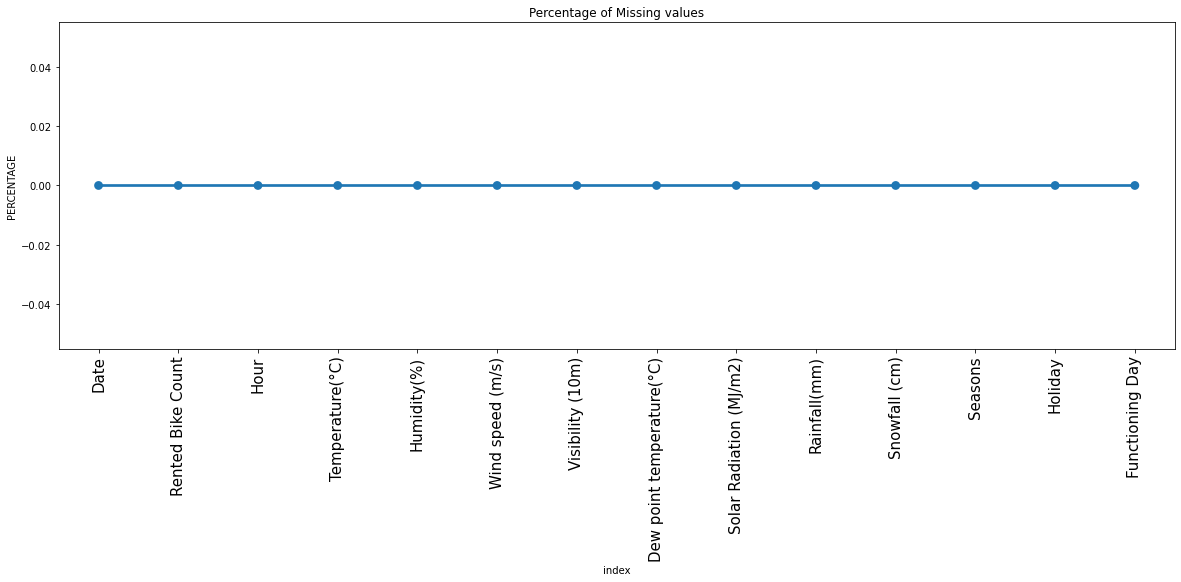

In [218]:
# Visualizing the missing values :
missing_data = df.isnull().sum()
missing_data = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(20,6))
ax = sns.pointplot('index',0,data=missing_data)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#### From the above graph it is clearly shown that, there is no Null values present in the data set.


### What did you know about your dataset?

The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values, which saves us a fair bit of work!

## ***2. Understanding Your Variables***

In [219]:
# Dataset Columns :
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [220]:
# Dataset Describe :
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Features Description.

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


### Check Unique Values for each variable.

In [221]:
# Check Unique Values for each variable :
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# ***3.Data Wrangling*** 

### ***Renaming the columns name :***
* #### Why do we need to rename the coulmn name?
#### We rename the column name just to make it more readable in the data set for better understanding.




In [222]:
# Renaming the Columns names and then checking the updated data set :
df = df.rename(columns={'Rented Bike Count': 'Rented_Bike_count', 'Hour': 'Hour','Temperature(°C)': 'Temperature', 'Humidity(%)': 'Humidity', 
                   'Wind speed (m/s)': 'Wind_speed','Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew_point_temperature',
                   'Solar Radiation (MJ/m2)': 'Solar_Radiation', 'Rainfall(mm)': 'Rainfall',
                   'Snowfall (cm)': 'Snowfall','Seasons': 'Seasons', 'Holiday': 'Holiday', 'Functioning Day': 'Functioning_day'})

In [223]:
# Checking the updated df :
df.head()

,Date,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **Extracting Date, Month, Year from Date column :**
#### Since, python read "Date" column as a object type( i.e. it reads as a string).As the date column is very important to analyze the users behaviour,
####So we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.



In [224]:
# We are extracting some extra columns to get more meaningful insights :
df['Date'] = pd.to_datetime(df['Date'])

# Computing day :
df['Day']=df['Date'].dt.day
# Computing month :            
df['Month']=df['Date'].dt.month    
# Computing year :     
df['Year']=df['Date'].dt.year        

*  We have convert the "Date" column into 3 different column i.e "Year","Month" and "Day" :
*  The "Year" column : contains the 2 unique numbers, details from 2017 december to 2018 november.So if i consider this a year then we don't need this column, so we can drop it.
*  The "Day" column : it contains the details about the each day of the month, considering day wise data is too long, so we concise this data into a day is a weekday or a weekend.
*  We convert it into this format and drop the "day" column.

In [225]:
# Creating a new column of "weekdays_weekend" :
df['weekdays_weekend']=df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
# Dropping the columns : "Date","Day","Year" : 
df=df.drop(columns=['Date','Day','Year'],axis=1)

In [226]:
# It always a good practice whatever code u execute, print and check it :
df.head()

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [227]:
# Let's Check the info of the new columns :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [228]:
df['weekdays_weekend'].value_counts()

0    8760
Name: weekdays_weekend, dtype: int64

## **Changing Data type (D-Type) :**

#### The d-type of the columns Hour, Month and weakends_weekday are int64 but in actual they are category dtype.

#### We need to change this d-type to keep our analysis on right track.

In [229]:
# Change the int64 D-type columns into category columns :
cols=['Hour','Month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [230]:
# It always a good practice whatever code u execute, print and check it :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# ***4. Exploratory Data Analysis and Visualization :*** ***Understand the relationships between variables*** 




* ## **Why do we perform EDA?**
 
 ## An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns and relationships that are not readily apparent.

* ##  **Univariate Analysis :**
## **Why do we perform univariate analysis?**
## The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

* ##  **Analysis of Dependent Variable :**
##  **What is a dependent variable in data analysis?**
## A dependent variable is a variable whose value will change depending on the value of another variable.


## **Let's Separate the data :**

* ### Before proceeding with the distribution check ,let's first split the data into 2 lists (i.e. numericals and categoricals) for better understanding.




### **Analyzing Categorical Data :**

* ### **What is Categorical data?**
#### The data which takes a limited number of possible values and need not to be in numerical form, it can be textual in nature.
#### It includes data type such as object and other category.

In [231]:
# Analyzing some patterns between dependent variables and categorical variables.
# Since, our dependent variable is "Rented_Bike_count".So we need to analysis this column with the other columns by using some visualisation plot.

[Text(0.5, 1.0, 'Count of Rented bikes according to Months')]

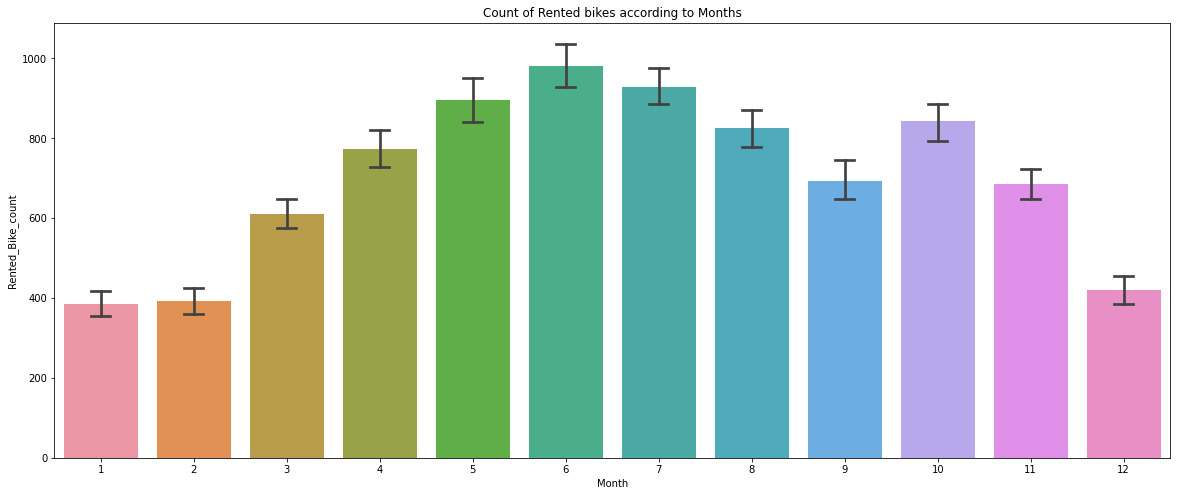

In [232]:
# Month v/s Rented_Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Month',y='Rented_Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Months')

**Observations :** 
 
 from the bar plot graph we can clearly say :-
*  The highest months during which the count of rented bike is most is 6 and 7
 (i.e. june and july)
* The count of rented bikes is least during the starting of the month and end of the month. (i.e. january , february and december)  



[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

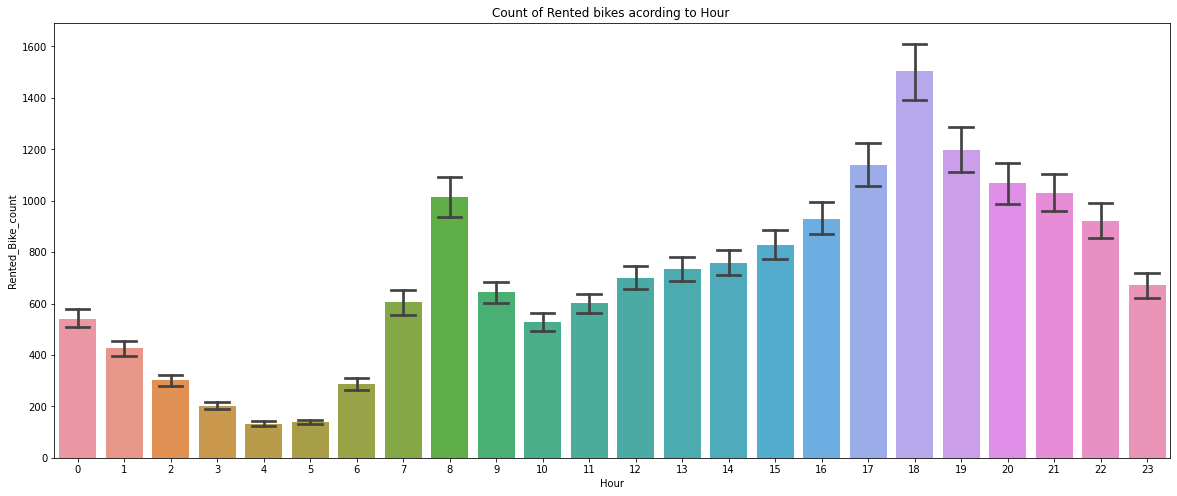

In [233]:
# Hour v/s Rented_Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_count',ax=ax,capsize=.5)
ax.set(title='Count of Rented bikes acording to Hour ')

**Observations :**


* The highest number of count of rented bikes are at 8 am and 6 pm. This timings are considered as peak timings. 

* From 6 - 9 pm the count of rented bikes are more as compared to any other timings of the day.









[Text(0.5, 1.0, 'Count of Rented bikes acording to Season ')]

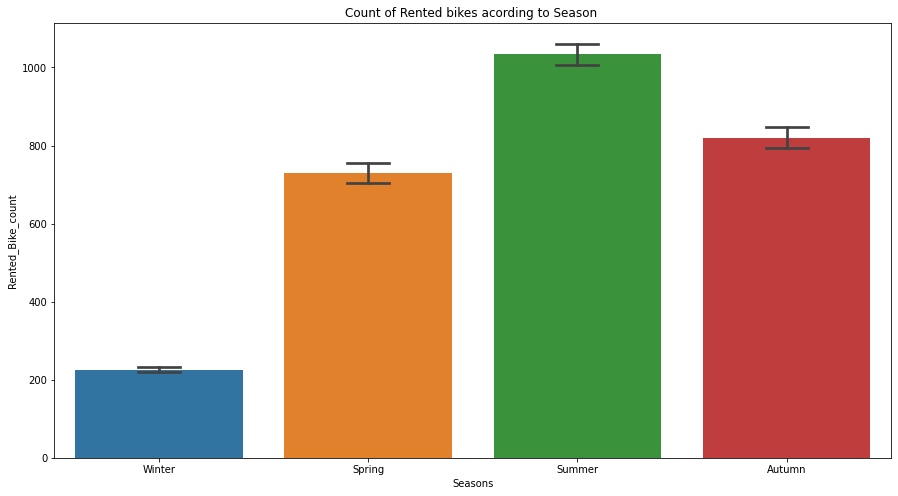

In [234]:
# Season v/s Bike_count :
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Season ')

**Observations :**

*   Summer and Autumn has the highest count of rented bikes compared to other sessons of the year.



[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

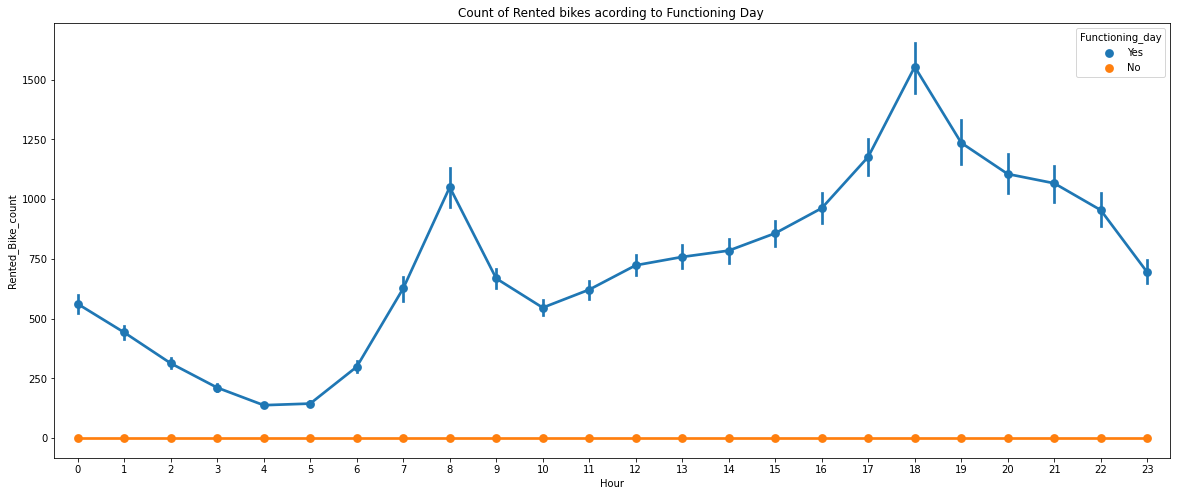

In [235]:
# Functioning_day v/s Bike_count graph :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Functioning_day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

**Observations :**

*  From the graph it has been clear that the count of rented bikes is '0' on non-working day , only on the working days rented bikes had been hired.



[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

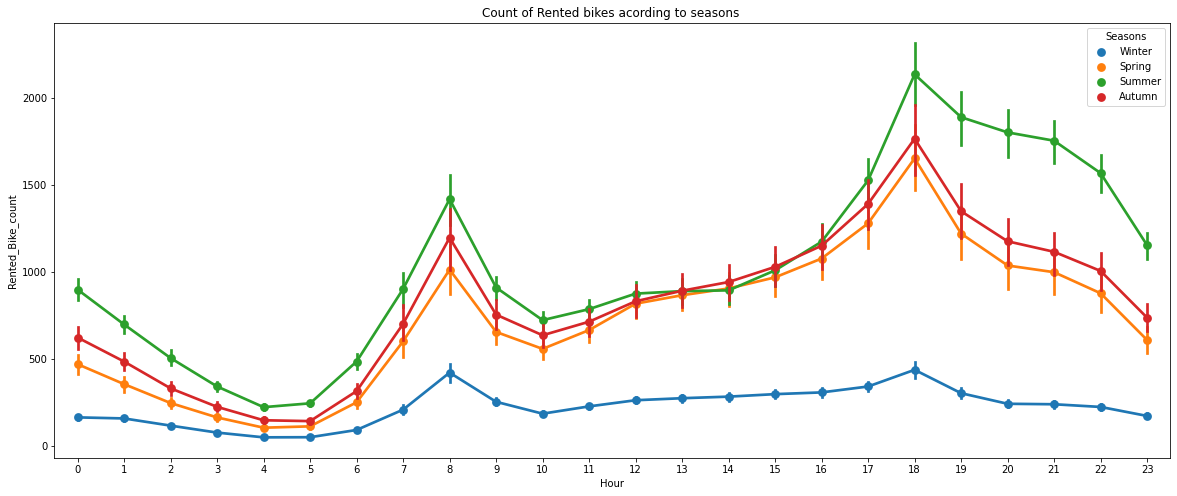

In [236]:
# Hour v/s Different types of seasons v/s the bike counts :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**Observations :**

* Which ever be the sesson the peak hours of the rented bikes remains the same i.e. 8 am and 6 pm throught the 365 days.

*   Summer sesson being the highest number of count of rented bikes while winter being the lowest, snowfall can be the major reason for the decrease in the number of rented bikes during winter.





[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

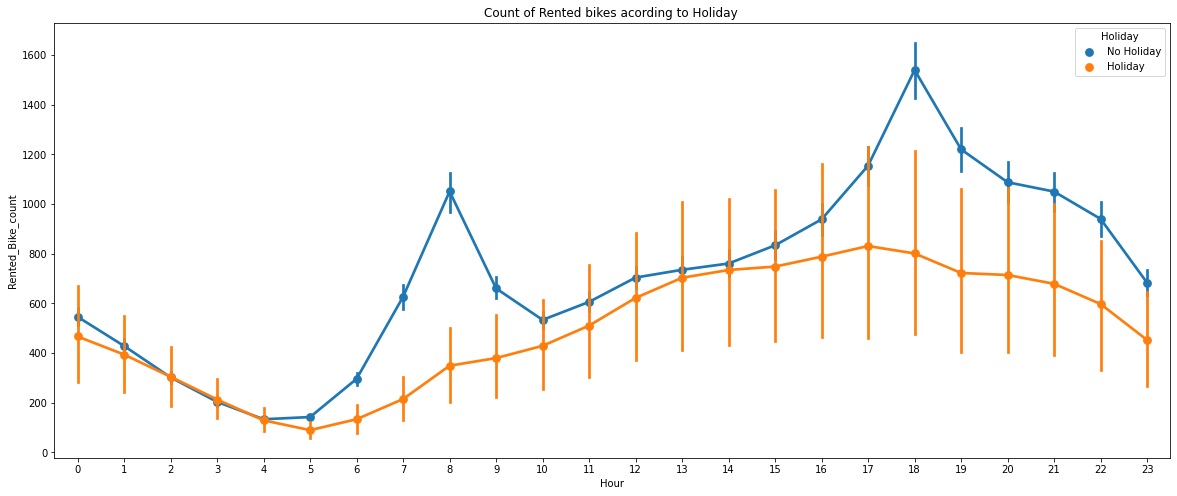

In [237]:
# Hour v/s bike counts v/s Holiday :
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

**Observations :**

*   Plot shows that in holiday, people uses the rented bike.

*   From 2pm-8pm the usage of the rented bikes is the highest.







### **Analyzing Numerical Data :**

* ### **What is Numerical data?**
#### Data which is expressed in numbers rather than natural language processing description. numerical data differentiates itself from other numbers in the form of data types (i.e. float64 and int64) with its ability to carry out arithmetic operations with these numbers.


In [238]:
# List of numerical variables :
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=df[numerical_columns]
numerical_features.head()


,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


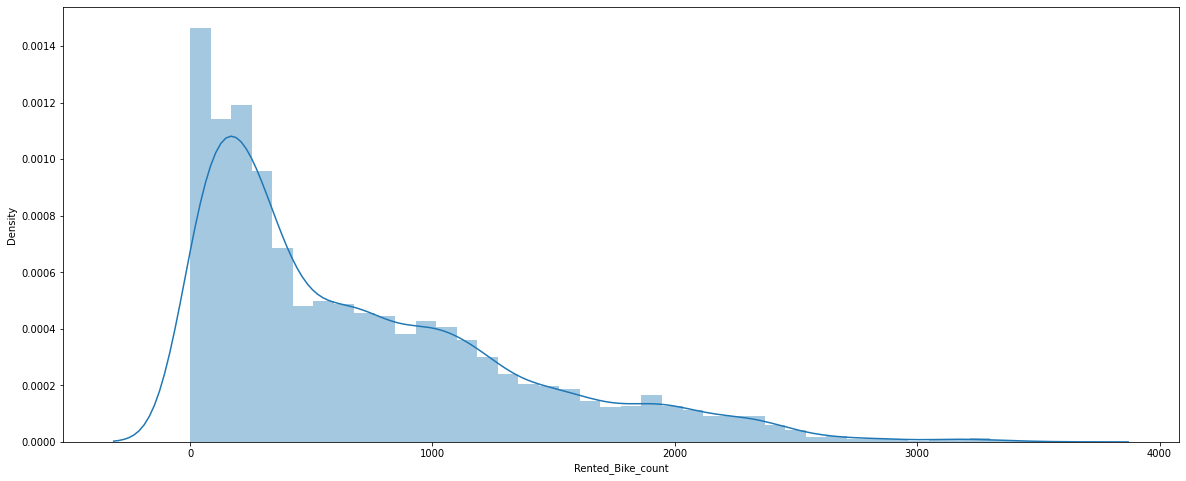

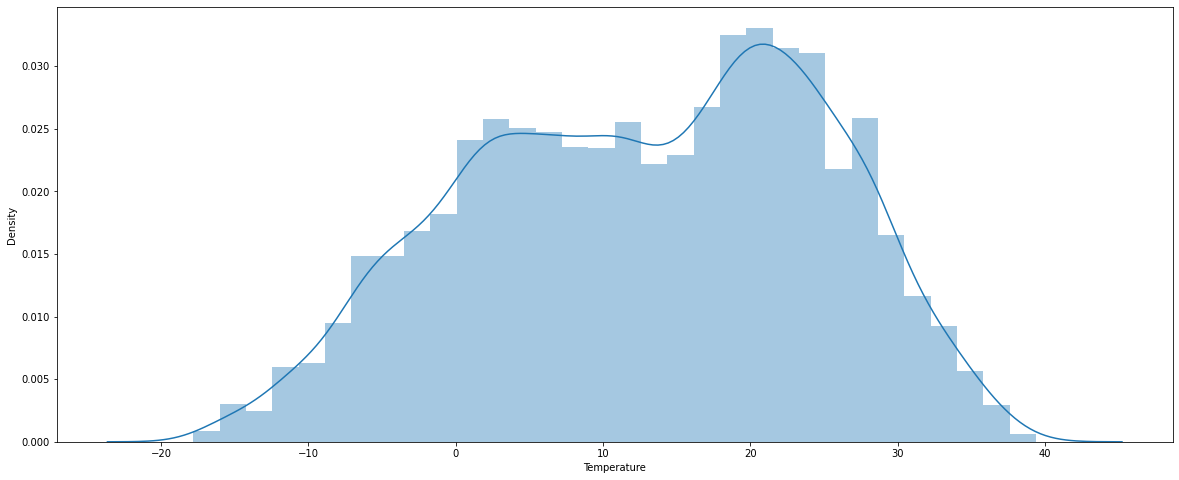

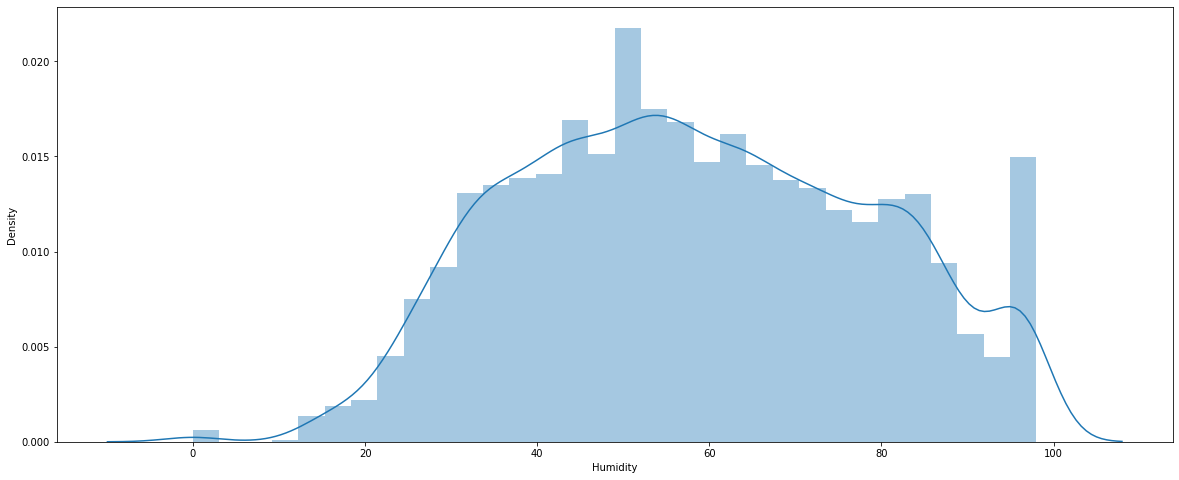

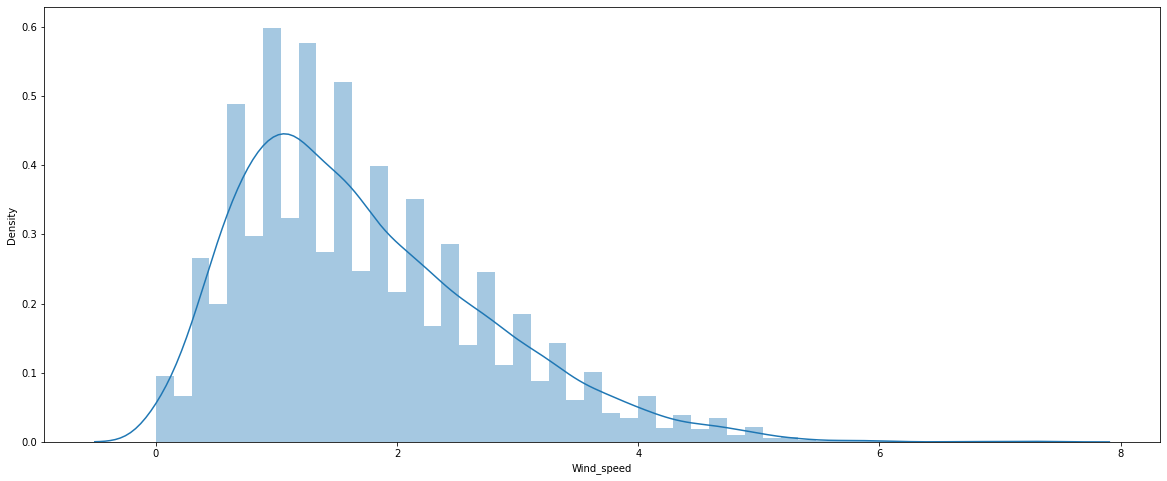

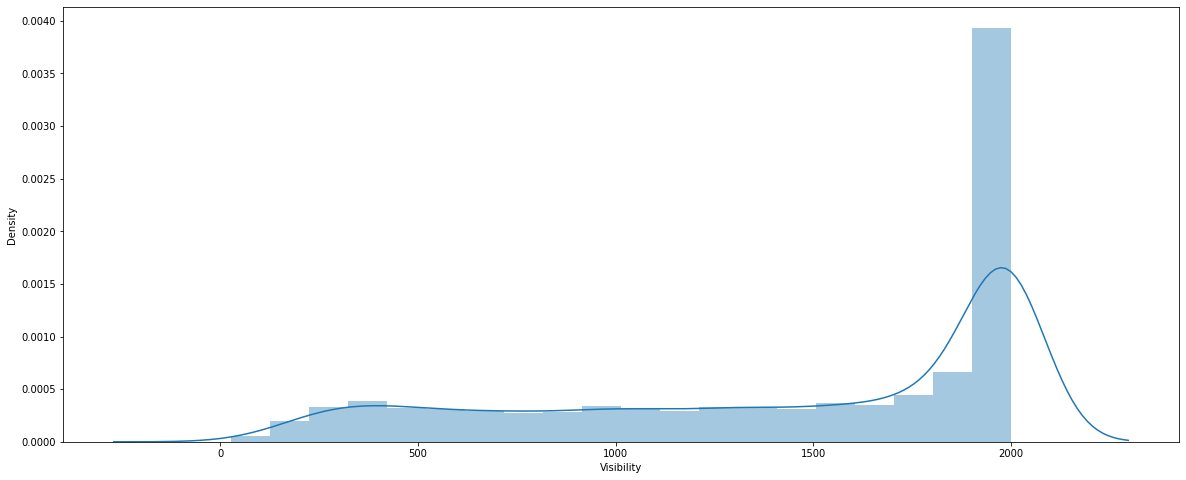

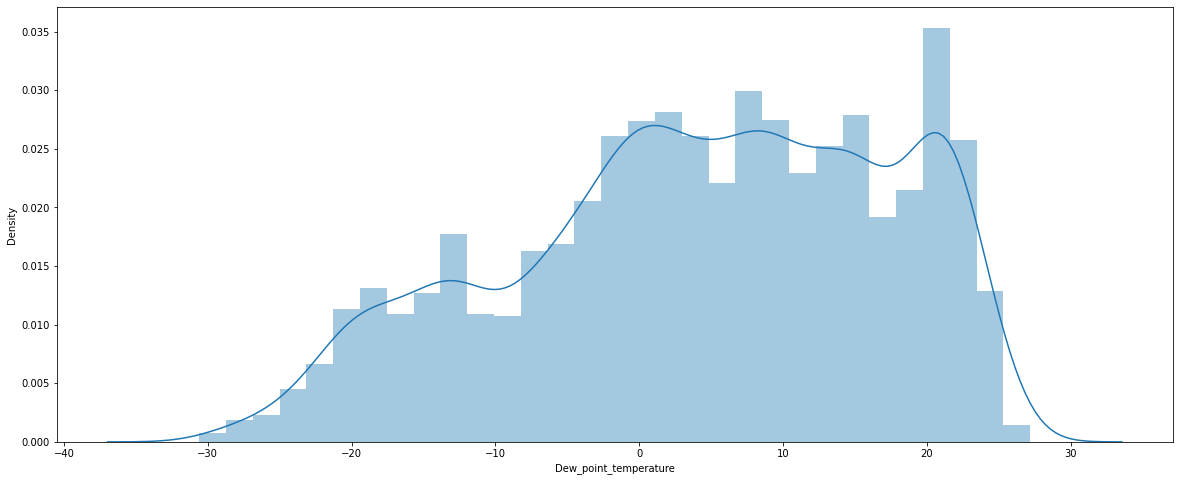

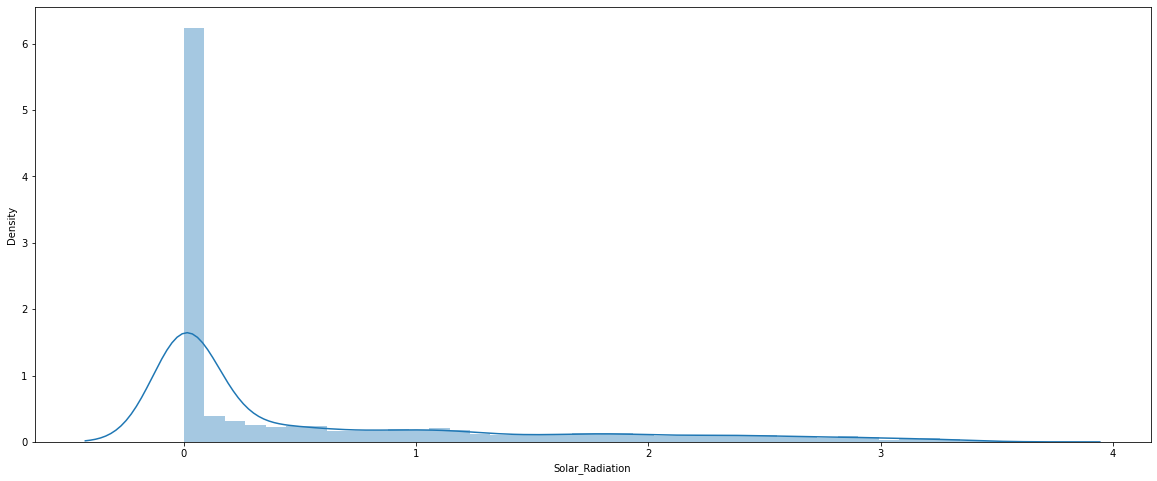

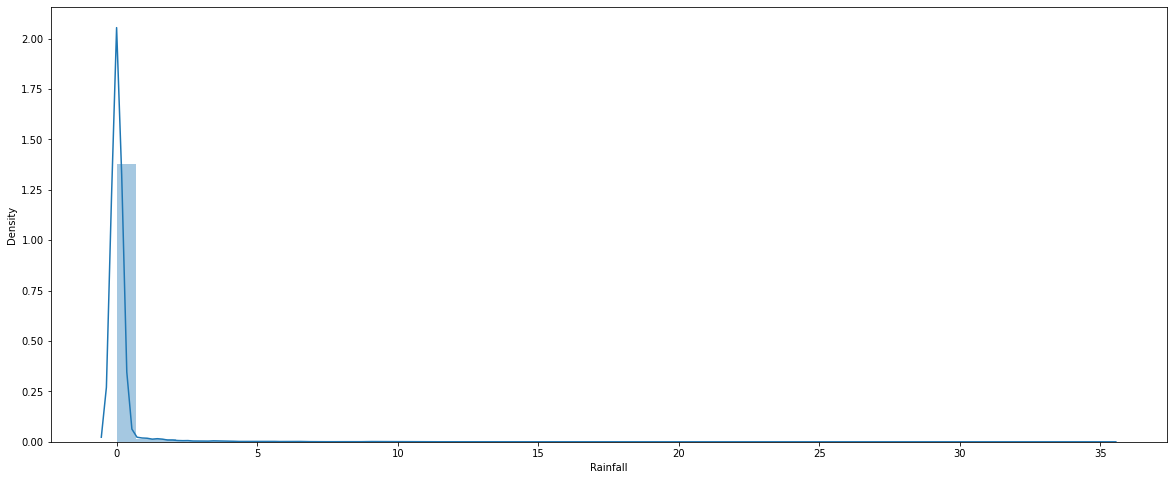

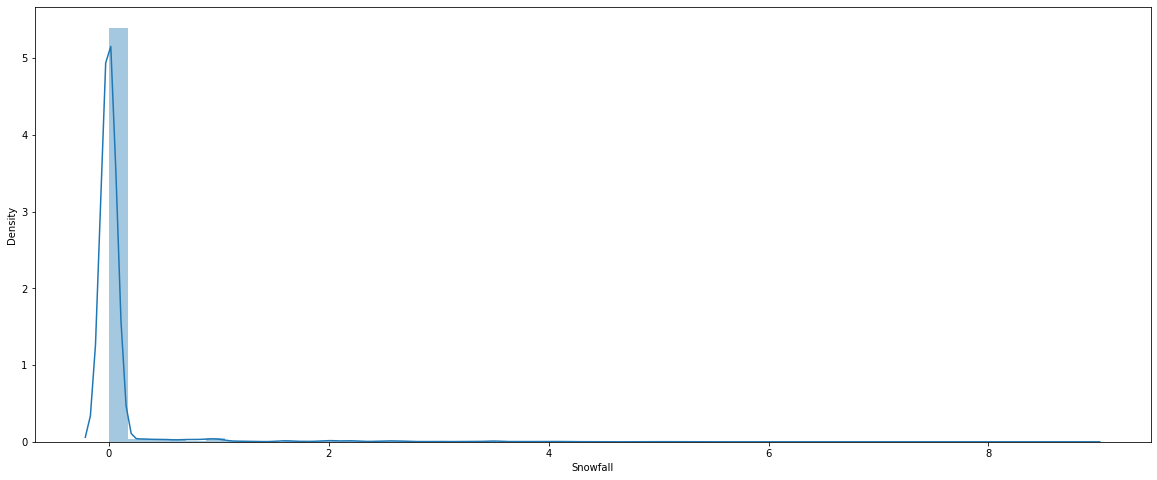

In [239]:
# Visualization displots to analyze the distribution of all numerical features :
for col in numerical_features :
  plt.figure(figsize=(20,8))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Text(0.5, 0, 'temp')

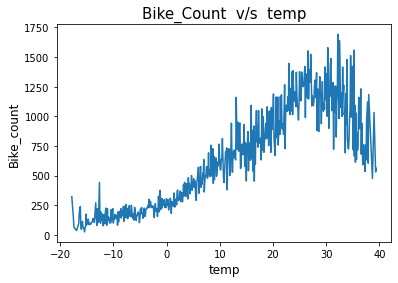

In [240]:
# Analyzing the relationship between "Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  temp",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('temp',fontsize=12)

**Observations :**

*   People like to ride bikes when it is pretty hot around 25°C in average, due to which the count of rented bikes is more neary this temperature.



Text(0.5, 0, 'Snow')

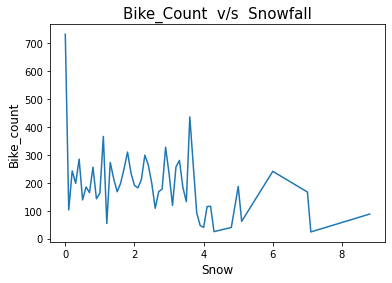

In [241]:
''' Finding out whether snowfall can be the major reason for decrease in count of rented bikes during winter.'''
# Analyzing the relationship between "Bike_Count" and "Snowfall"
df.groupby('Snowfall').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Snowfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Snow',fontsize=12)

**Observations :**

*   Although the count of rented bikes in winter is less when compared to other wheathers but as soon as the snowfall reaches beyond 4cm there has been an drastic drop in the count of rented bikes.

*   From this we can easily predict that snowfall plays a major role in the count of rented bikes .





Text(0.5, 0, 'Rain')

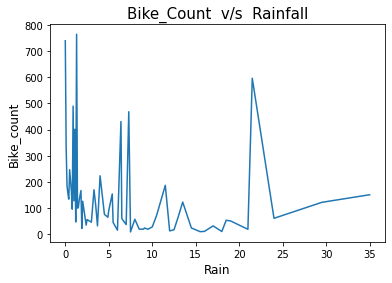

In [242]:
''' Checking whether increase in the rainfall can decrease the count of rented bikes. '''
# Analyzing the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Rainfall",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Rain',fontsize=12)

**Observations :**

* We can see from the above graph that even if it rains heavily the demand of the rent bikes is not decreasing drastically,for example even there is a drop in rented bikes between 10-15 mm rainfall but at 20 mm of rain there is an big hike again for rented bikes.

* So we can conclude that rainfall does not affect the number of the rented bikes much.





Text(0.5, 0, 'Wind')

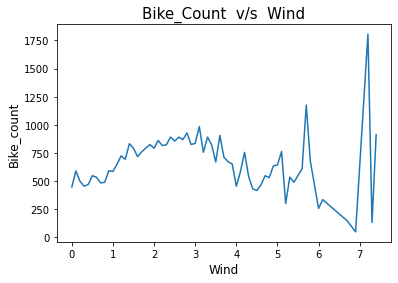

In [243]:
# Analyzing the relationship between "Bike_Count" and "Wind" 
df.groupby('Wind_speed').mean()['Rented_Bike_count'].plot()
plt.title("Bike_Count  v/s  Wind",fontsize=15)
plt.ylabel('Bike_count',fontsize=12)
plt.xlabel('Wind',fontsize=12)

**Observations :**

*  We can see from the above graph that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.


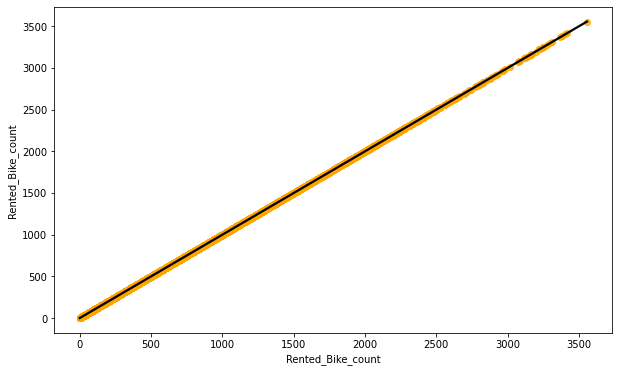

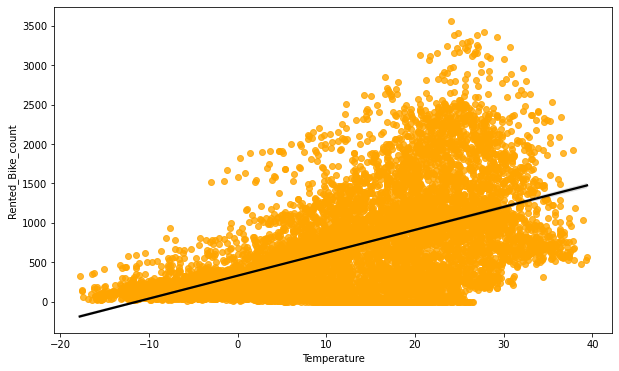

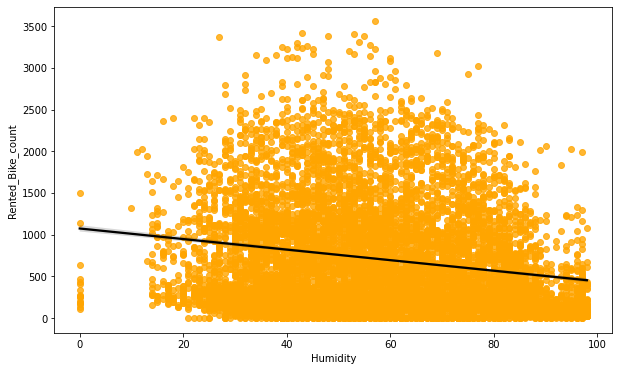

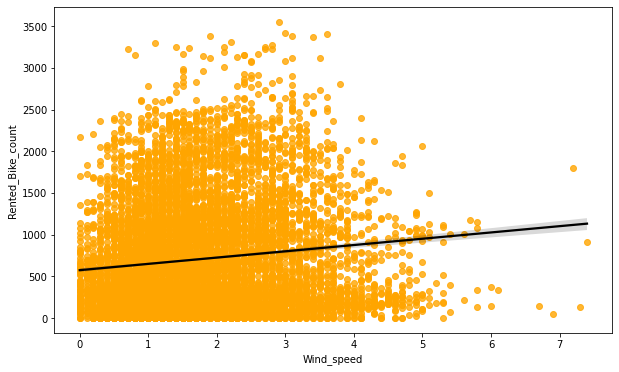

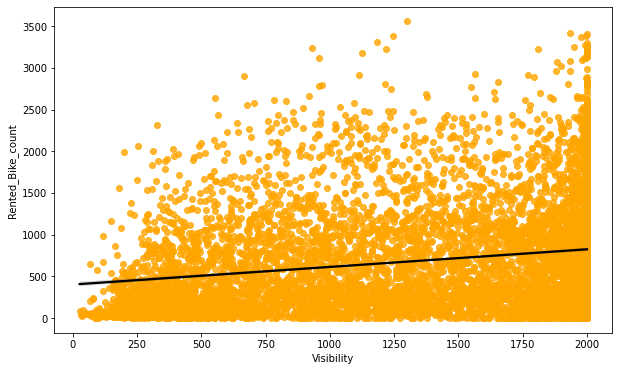

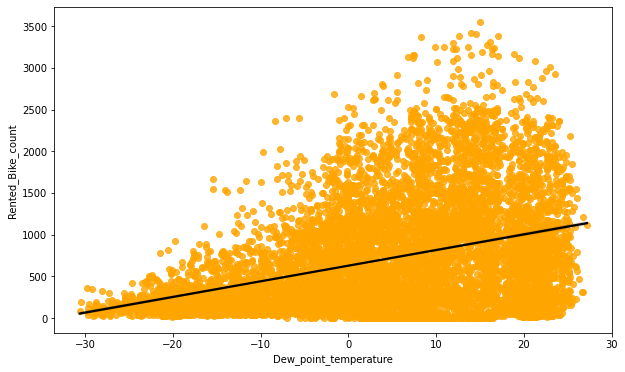

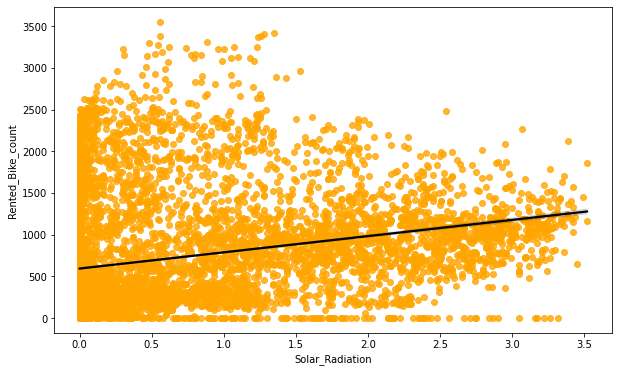

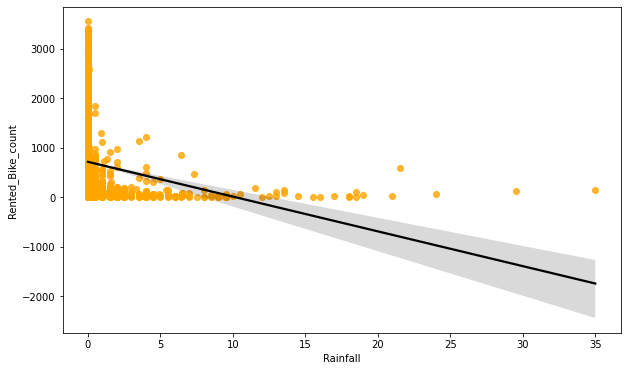

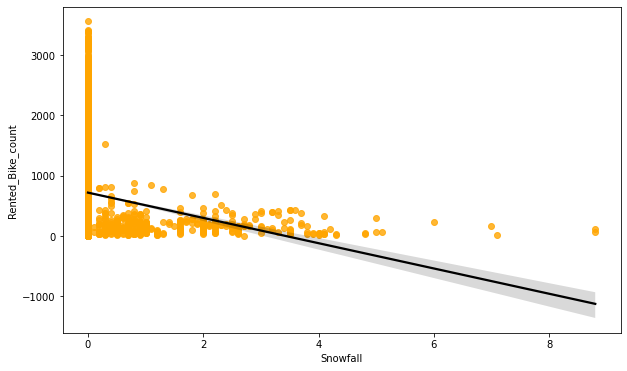

In [244]:
# Visualizing the regression plot for all the numerical features :
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x= df[col],y= df['Rented_Bike_count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

**Observations :**
* From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.
* Which means the rented bike count increases with increase of these features.
* 'Rainfall', 'Snowfall', 'Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.

In [245]:
# Checking the skewness of the target variable :
print(f'Skewness of original data : {df.Rented_Bike_count.skew()}')

print(f'Skewness after transformation : {np.sqrt(df.Rented_Bike_count).skew()}')

Skewness of original data : 1.1534281773679014
Skewness after transformation : 0.237362090985412


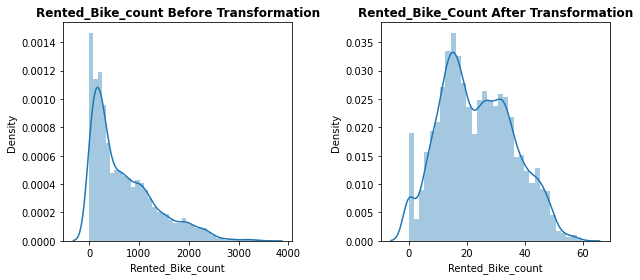

In [246]:
# Since Sqrt transformation gives skewness between -0.5 and 0.5 indicates that, the distribution is fairly symmetrical we will use it :
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented_Bike_count']).set_title('Rented_Bike_count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented_Bike_count'])).set_title('Rented_Bike_Count After Transformation',weight='bold')
plt.tight_layout()

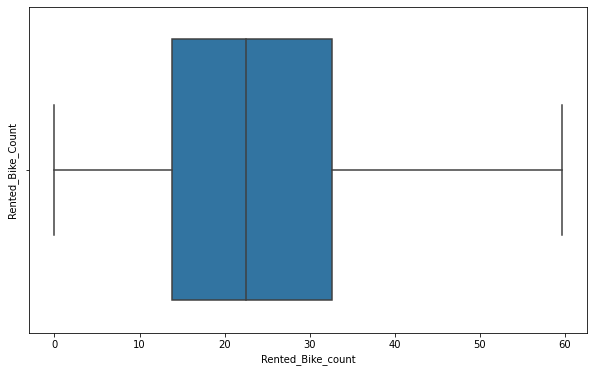

In [247]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_count']))
plt.show()

In [248]:
df.corr()

,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

##**Checking of Correlation between variables**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

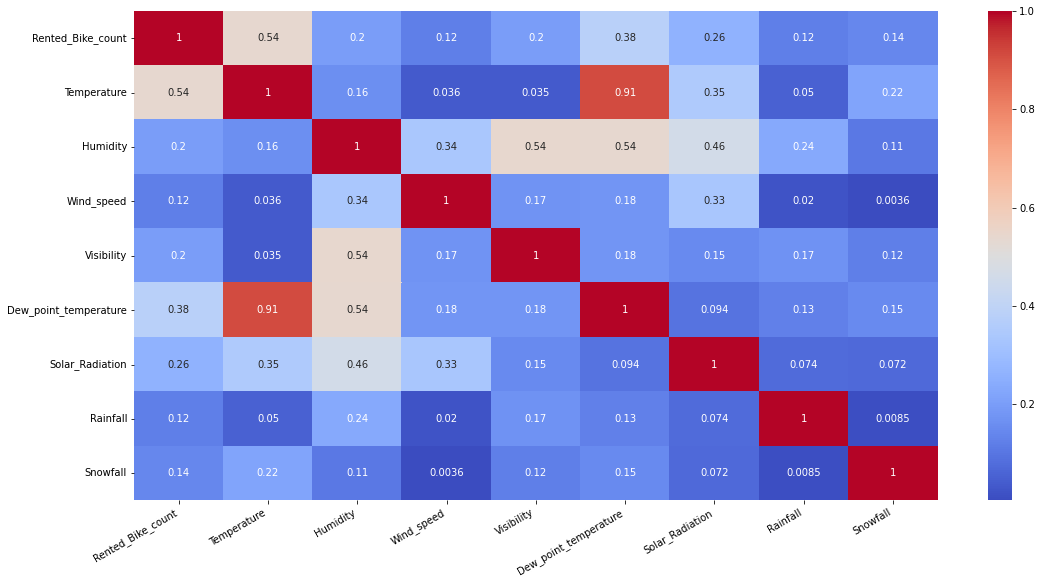

In [249]:
# Checking corelations :
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop 1 of this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

# What is Variance Inflation Factor (VIF) ?

### A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model





In [250]:
'''from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif) '''

'from statsmodels.stats.outliers_influence import variance_inflation_factor\ndef calc_vif(X):\n \n   # Calculating VIF\n   vif = pd.DataFrame()\n   vif["variables"] = X.columns\n   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n \n   return(vif) '

## **Let's first Analyze dependent and independent variables :**

In [251]:
''' Since, we need to predict the count of rented bikes. So our DV column is Rented_bike_count. '''

' Since, we need to predict the count of rented bikes. So our DV column is Rented_bike_count. '

In [252]:
# Finding out VIF of independent variables :
''' independent_variables = [i for i in numerical_features.columns if i not in ['Rented_Bike_count']]
calc_vif(df[independent_variables]) '''

" independent_variables = [i for i in numerical_features.columns if i not in ['Rented_Bike_count']]\ncalc_vif(df[independent_variables]) "


* **Temperature and dew_point_temperature has the highest VIF, but temperature column can give us more insights as compared to due_point_temperature.**



* **So we decide to drop due_point_temperature.**








In [253]:
# Dropping Column Due_point_temperature  :
''' independent_variables = [i for i in numerical_features.columns if i not in ['Rented_Bike_count','Dew_point_temperature']]
calc_vif(df[independent_variables]) '''

" independent_variables = [i for i in numerical_features.columns if i not in ['Rented_Bike_count','Dew_point_temperature']]\ncalc_vif(df[independent_variables]) "

In [254]:
# Updating the dataset :
''' df = df[independent_variables + ['Rented_Bike_count']]

# checking again the corelations : 
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show() '''

" df = df[independent_variables + ['Rented_Bike_count']]\n\n# checking again the corelations : \nplt.figure(figsize=(18,9))\nplot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')\nplot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')\nplt.show() "

In [255]:
#drop the Dew point temperature column
df= df.drop(['Dew_point_temperature'],axis=1)

In [256]:
df.head()

,Rented_Bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0




* **There is no multi-collinearity present in the dataset.** 


## ***5. Feature Engineering & Data Pre-processing***

### 5.1. Categorical Encoding :

Creating dummy variables :
**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [257]:
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'Month', 'weekdays_weekend']

One- Hot Encoding:

In [258]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_day', 'Month',
       'weekdays_weekend'],
      dtype='object')

In [259]:
#creat a copy
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()  

,Rented_Bike_count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Train Test split for regression**

* Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. 

* This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. 
* The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. 

* In this step we will split our data into training and testing set using scikit learn library.


## What is Independent variables ?

* ### An independent variable is exactly what it sounds like, a variable that stands alone and isn't changed by the other variables you are trying to measure. It tries to explain the value or effect of the output variable (dependent variable) by creating a relationship between an independent and dependent variable.

* ###  For example, in a plant growth study, the independent variables might be soil moisture (continuous) and type of fertilizer (categorical). 






## What is our Dependent variables (Y) ?

*  The dependent variable (DV) is what you want to use the model to explain or predict. The values of this variable depend on other variables. It is the outcome that you're studying. It's also known as the response variable, outcome variable, and left-hand variable.

* For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got the night before you took the test, or even how hungry you were when you took it.


* Therefore, DV = Rented_Bike_count






In [260]:
# Assigning the value of independent variable (X) and dependent variable (Y) :
X = df_copy.drop(columns=['Rented_Bike_count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_count'])

In [261]:
# It always a good practice whatever code u execute, print and check it :
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
# It always a good practice whatever code u execute, print and check it :
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_count, dtype: float64

In [263]:
# Creating test and train data-Set :

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 46)
(2190, 46)


In [264]:
df_copy.describe().columns

Index(['Rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

## ***7. ML Model Implementation***

### ML Model - Linear Regression.

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.

In [265]:
# Model fiting :
reg= LinearRegression().fit(X_train, y_train)

In [266]:
# Check the score :
reg.score(X_train, y_train)

0.7550895705696371

In [267]:
# Checking the coefficeint :
reg.coef_

array([ 4.77011883e-01, -1.37061274e-01, -1.31503684e-01,  5.47101393e-04,
        1.09682297e+00, -1.47083345e+00,  3.31154149e-02, -1.96988945e+00,
       -5.01481297e+00, -7.32057879e+00, -9.57471610e+00, -9.13468340e+00,
       -4.13641804e+00,  2.12196870e+00,  7.21739348e+00,  9.34851116e-01,
       -3.49384784e+00, -3.76476533e+00, -3.06827330e+00, -3.28410739e+00,
       -3.45815377e+00, -2.15064234e+00,  3.20565834e-02,  3.81311918e+00,
        1.02768804e+01,  6.87891194e+00,  6.23259936e+00,  6.35041220e+00,
        5.08863396e+00,  1.46754203e+00, -2.64183480e+00, -3.38258792e+00,
       -6.55162168e+00,  2.92883310e+00,  2.78041275e+01, -8.55096149e-01,
        2.31204418e-01,  2.91962713e-01,  1.48496044e+00,  4.31930042e+00,
       -2.13245881e-01, -7.61443918e-01,  2.80093110e-01,  2.19131912e+00,
        1.05821017e+00,  1.14222178e+00])

In [268]:
# Get the X_train and X-test value :
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [269]:
# Using training set :
# Calculate MSE :
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

# Calculate RMSE :
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


# Calculate MAE :
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

# Calculate r2 and adjusted r2 :
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.71392327288959
RMSE : 6.141166279534335
MAE : 4.663291920282628
R2 : 0.7550895705696371
Adjusted R2 : 0.7498325104885374


**Looks like our r2 score value is 0.75 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [270]:
# Storing the train-set metrics value in a dataframe for later comparison :
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [271]:
# Using test set :

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 36.780202848204276
RMSE : 6.064668403812716
MAE : 4.668778939763264
R2 : 0.7671643965466111
Adjusted R2 : 0.7621665254505514


**The r2_score for the test set is 0.76. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [272]:
# storing the test set metrics value in a dataframe for later comparison :
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

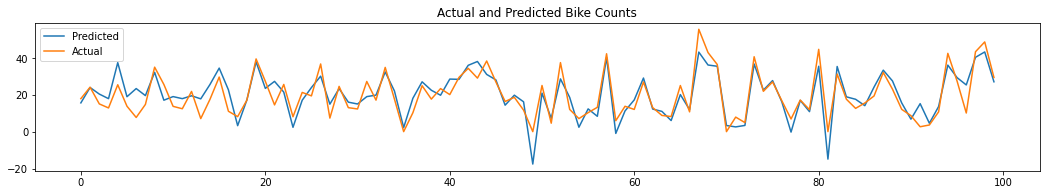

In [273]:
  # Visualizing evaluation Metric Score chart :
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')

#**LASSO REGRESSION** 